In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.cross_validation import train_test_split


pd.options.mode.chained_assignment = None  # default='warn'


train_list = ['180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
          '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
          '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
          '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
          '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021',\
           '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029','181101',\
             '181030','181031','181101', '181102']

valid_list = ['181103','181104','181105', '181106', '181107', '181108', '181109','181110']


day_all = ['180531','180602', '180603', '180604', '180605', '180606', '180607', '180608', '180609', '180610',\
           '180611', '180612', '180613', '180614', '180615', '180616', '180617', '180618', '180619', '180620',\
           '180621', '180622', '180623', '180624', '180625', '180626', '180627', '180628', '180629', '180630',\
           '180701', '180702', '180703', '180704', '180705', '180706', '180707', '180708', '180709', '180710', \
           '180711', '180712', '180713', '180714', '180715',\
           '180716', '180717', '180718', '180719', '180720', '180721', '180722', '180723', '180724', '180725',\
           '180726', '180727', '180728', '180729', '180730', '180731', '180801', '180802', '180803', '180804',\
           '180805', '180806', '180807', '180808', '180809', '180810', '180811', '180812', '180813', '180814',\
           '180815', '180816', '180817', '180818', '180819', '180820', '180821', '180822', \
            '180828', '180829', '180830', '180831', '180901', '180902', '180903', '180904', '180905',\
           '180906', '180907', '180908', '180909', '180910', '180911', '180912', '180913', '180914', '180915',\
           '180916', '180917', '180918', '180919', '180920', '180921', '180922', '180923', '180924', '180925', \
            '180926', '180927', '180928', '180929', '180930', '181001', '181002', '181003', '181004', '181005', \
           '181006', '181007', '181008', '181009', '181010', '181011', '181012', '181013', '181014', '181015', \
           '181016', '181017', '181018', '181019', '181020', '181021','181022',\
            '181022', '181023', '181024', '181025', '181026', '181027', '181028', '181029', '181030', \
           '181031', '181101', '181102', '181103', '181104', '181105', '181106', '181107', '181108', '181109',\
           '181110', '181111']

c:\program files\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
del_cols = ['day_7_bef_start_time'\
        ,'day_7_bef_end_time'\
        ,'day_8_bef_start_time'\
        ,'day_8_bef_end_time'\
        ,'day_9_bef_start_time'\
        ,'day_9_bef_end_time'\
        ,'day_10_bef_start_time'\
        ,'day_10_bef_end_time'\
        ,'day_11_bef_start_time'\
        ,'day_11_bef_end_time'\
        ,'day_12_bef_start_time'\
        ,'day_12_bef_end_time'\
        ,'day_13_bef_start_time'\
        ,'day_13_bef_end_time'\
        ,'day_14_bef_start_time'\
        ,'day_14_bef_end_time',\
        'v_date','order_d','from_time_1000_start',\
                                                            'start_time','order_id','day_0_bef_start_time',\
                                                            'day_bef_0_dt'  ]

In [2]:

# 划分训练集， 验证集 测试集
str_cols = ['order_id','job_name',\
            'start_time','end_time',\
            'day_0_bef_end_time']
features_all_merge = pd.read_csv('edt_allfeature_score1119.csv')
features_all_merge = features_all_merge['feature'][:53]
#read_cols = list(set(str_cols+features_all))
read_cols = list(set(str_cols+list(features_all_merge)))

# read_cols = [cl for cl in read_cols if cl not in del_cols]

train_df = []
n_i = 1  #选取第几轮数据切片
#
for day in train_list:
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=4000,usecols=read_cols)

    #day_all_data = day_all_data[day_all_data.end_time.notnull()]

    #过滤结束日期超过2天的
    #print(day_all_data.shape)
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]

    train_df.append(day_all_data)
    print(day,end=' ') 
    
train = pd.concat(train_df, ignore_index=True)


valid_df = []
for day in valid_list:
    print(day,end=' ')
    if day >='181105':
        day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=5000,usecols=read_cols)
    else:
        day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,nrows=5000,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'235959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    valid_df.append(day_all_data)
    
valid = pd.concat(valid_df, ignore_index=True)

train['his_evet_count_null'] = train['all_count'].apply(lambda x:x is None).apply(int)
valid['his_evet_count_null'] = valid['all_count'].apply(lambda x:x is None).apply(int)
train.fillna(0,inplace=True)
valid.fillna(0,inplace=True)

print('\n')
print(train.shape)
print(valid.shape)

180828 180829 180830 180831 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 

KeyboardInterrupt: 

In [4]:
#过滤训练不需要的数据字段
del_cols = ['day_7_bef_start_time'\
        ,'day_7_bef_end_time'\
        ,'day_8_bef_start_time'\
        ,'day_8_bef_end_time'\
        ,'day_9_bef_start_time'\
        ,'day_9_bef_end_time'\
        ,'day_10_bef_start_time'\
        ,'day_10_bef_end_time'\
        ,'day_11_bef_start_time'\
        ,'day_11_bef_end_time'\
        ,'day_12_bef_start_time'\
        ,'day_12_bef_end_time'\
        ,'day_13_bef_start_time'\
        ,'day_13_bef_end_time'\
        ,'day_14_bef_start_time'\
        ,'day_14_bef_end_time']
cols_train =[clm for clm in valid.columns if clm not in ['order_id','job_name','v_date','order_d','from_time_1000_start',\
                                                            'start_time','end_time','order_id','job_name','day_0_bef_start_time',\
                                                            'day_0_bef_end_time','day_bef_0_dt']]
cols_train = [cl for cl in cols_train if cl not in del_cols]

valid_x = valid[cols_train]
valid_y = valid['day_0_bef_end_time']

train_x,test_x,train_y,test_y = train_test_split(train[cols_train],train['day_0_bef_end_time'],random_state=33,test_size=0.1)

# train_y = train_y.fillna(train_y.mean())
# valid_y = valid_y.fillna(valid_y.mean())
# test_y = test_y.fillna(test_y.mean())  

print(train_x.shape)
print(test_x.shape)
print(valid_x.shape)

(244059, 307)
(27118, 307)
(25732, 307)


In [50]:
#基准
#查看 end_time 和day_1_7_bef_end_time_median  day_1_7_bef_end_time_mean day_1_14_bef_end_time_mean
valid_list =[ '181103','181104','181105', '181106', '181107', '181108', '181109','181110']
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'045959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    
#     day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
#     day_all_data.fillna(0,inplace=True)

#     valid_x = day_all_data[cols_train]
#     valid_y = day_all_data['day_0_bef_end_time']

    
#     vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    
#     day_all_data['pred_edt'] = vlid_pred
#     day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
#     day_all_data.to_csv('see_error_%s.csv'%day,index=False)
    print('The MAE of valid_data is:', mean_absolute_error(day_all_data['day_0_bef_end_time'], day_all_data['day_1_14_bef_end_time_median']))
    #print('The MSE of prediction valid_data is:', mean_absolute_error()
    
#     print('The MAE of prediction valid_data is:', mean_absolute_error(day_all_data[], vlid_pred))
    print('The MSE of  valid_data is:', mean_squared_error(day_all_data['day_0_bef_end_time'],day_all_data['day_1_14_bef_end_time_median']))

181103 (175980, 311)
The MAE of valid_data is: 330.17617627
The MSE of  valid_data is: 228746.036145
181104 (145878, 311)
The MAE of valid_data is: 89.7367286363
The MSE of  valid_data is: 30874.1433338
181105 (99026, 311)
The MAE of valid_data is: 82.8426019429
The MSE of  valid_data is: 21174.5871968
181106 (93094, 311)
The MAE of valid_data is: 66.4224547232
The MSE of  valid_data is: 18543.7181397
181107 (71380, 311)
The MAE of valid_data is: 67.8802115438
The MSE of  valid_data is: 20516.9820783
181108 (58269, 311)
The MAE of valid_data is: 63.8038150646
The MSE of  valid_data is: 23666.0034796
181109 (41240, 311)
The MAE of valid_data is: 79.9974054316
The MSE of  valid_data is: 42706.0739331
181110 (25953, 311)
The MAE of valid_data is: 94.1001232998
The MSE of  valid_data is: 69425.3946268


In [7]:
#基准
#查看 end_time 和day_1_7_bef_end_time_median  day_1_7_bef_end_time_mean day_1_14_bef_end_time_mean
valid_list =[ '181104','181105', '181106', '181107', '181108', '181109','181110']
for day in valid_list:
    print(day,end=' ')
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'045959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    
#     day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
#     day_all_data.fillna(0,inplace=True)

#     valid_x = day_all_data[cols_train]
#     valid_y = day_all_data['day_0_bef_end_time']

    
#     vlid_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    
#     day_all_data['pred_edt'] = vlid_pred
#     day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
#     day_all_data.to_csv('see_error_%s.csv'%day,index=False)
    print('The MAE of valid_data is:', mean_absolute_error(day_all_data['day_0_bef_end_time'], day_all_data['day_1_7_bef_end_time_median']))
    #print('The MSE of prediction valid_data is:', mean_absolute_error()
    
#     print('The MAE of prediction valid_data is:', mean_absolute_error(day_all_data[], vlid_pred))
    print('The MSE of  valid_data is:', mean_squared_error(day_all_data['day_0_bef_end_time'],day_all_data['day_1_7_bef_end_time_median']))

181104 (145878, 143)
The MAE of valid_data is: 90.2959802026
The MSE of  valid_data is: 30625.1348387
181105 (99026, 143)
The MAE of valid_data is: 80.8563559065
The MSE of  valid_data is: 19826.5096969
181106 (93094, 143)
The MAE of valid_data is: 68.4720067888
The MSE of  valid_data is: 19212.5078254
181107 (71380, 143)
The MAE of valid_data is: 70.1820327823
The MSE of  valid_data is: 22322.8577788
181108 (58269, 143)
The MAE of valid_data is: 63.1063944808
The MSE of  valid_data is: 24533.2949296
181109 (41240, 143)
The MAE of valid_data is: 81.5190470417
The MSE of  valid_data is: 43067.1952655
181110 (25953, 143)
The MAE of valid_data is: 99.4778830964
The MSE of  valid_data is: 71157.570618


In [58]:
# lightgbm 算法预测
import json
import lightgbm as lgb

features = features_all_merge[:52]

y_train = train_y.values
y_test = test_y.values

# X_train = train_x.values
# X_test = test_x.values
X_train = train_x[features].values
X_test = test_x[features].values
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train,silent=True)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
params = {'task': 'train',
   'boosting_type': 'gbdt',
   'objective': 'regression',
   'metric':  'l2',
   'num_leaves': 2**9,
   'learning_rate': 0.1,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'bagging_freq': 5,
   'verbose': 50,
    'verbose_eval':50}
  
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=False)

# print('Save model...')

# # save model to file
# from sklearn.externals import joblib
# joblib.dump(gbm,'edt_gbm.pkl')
# clf = joblib.load("edt_gbm.pkl")

# gbm.save_model('lightgbm_model_edt.txt')
print('Start predicting...')


# predict

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
#clf_pred = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
# eval print(y_pred)
print('The MAE of prediction train_data is:', mean_absolute_error(y_test, y_pred))
print('The MAE of prediction valid_data is:', mean_absolute_error(valid_y, vlid_pred))
# print('The mean_absolute_error of prediction valid_data is:', mean_absolute_error(valid_y, clf_pred))
print('The MSE of prediction train_data is:', mean_squared_error(y_test, y_pred))
print('The MSE of prediction valid_data is:', mean_squared_error(valid_y, vlid_pred))


Start training...
Start predicting...
The MAE of prediction train_data is: 81.299371429
The MAE of prediction valid_data is: 66.2161606768
The MSE of prediction train_data is: 23884.6960238
The MSE of prediction valid_data is: 18579.8074613


In [ ]:
Start training...
Start predicting...
The MAE of prediction train_data is: 86.7824507016
The MAE of prediction valid_data is: 65.6009048244
The MSE of prediction train_data is: 26006.4594951
The MSE of prediction valid_data is: 18066.8303094
    8
The MAE of prediction train_data is: 86.7824507016
The MAE of prediction valid_data is: 65.6009048244
The MSE of prediction train_data is: 26006.4594951
The MSE of prediction valid_data is: 18066.8303094
    7
The MAE of prediction train_data is: 92.8500251483
The MAE of prediction valid_data is: 66.6062690464
The MSE of prediction train_data is: 29074.0638755
The MSE of prediction valid_data is: 19054.3370925

In [57]:
#测试选取多少迭代次数合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(3,100):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:53]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**8,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=i,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

KeyboardInterrupt: 

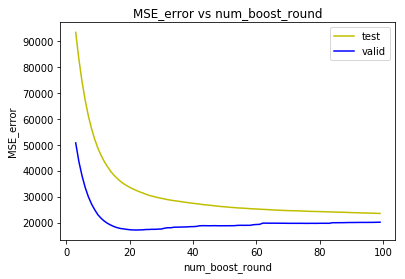

In [45]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_boost_round')
plt.title('MSE_error vs num_boost_round')
plt.legend()
plt.show()


In [53]:
#测试选取多少迭代次数合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(1,14):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:53]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**i,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=50,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

1 2 3 4 5 6 7 8 9 10 11 12 13 

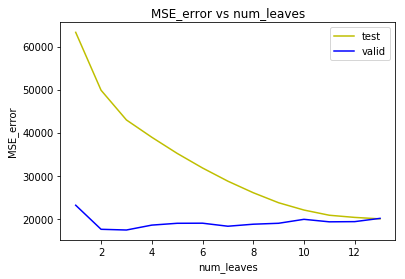

In [54]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_leaves')
plt.title('MSE_error vs num_leaves')
plt.legend()
plt.show()

In [55]:
for i,er in zip(x_list,valid_mse):
    print(i,er)

1 23187.5786241
2 17607.6704527
3 17441.2613712
4 18576.9707006
5 19000.4399525
6 19022.274516
7 18318.005529
8 18786.2805308
9 19003.8968038
10 19919.9558323
11 19339.3479555
12 19384.3308219
13 20142.9615905


In [46]:
for i,er in zip(x_list,valid_mse):
    print(i,er)

3 50740.7822126
4 43570.7360376
5 38043.953946
6 33511.9653451
7 29964.1204708
8 27174.7222342
9 24948.1685137
10 23030.4215084
11 21679.3280058
12 20594.7112233
13 19736.7226578
14 19077.5684928
15 18513.0456744
16 18077.0066365
17 17760.8175793
18 17590.194538
19 17412.9027221
20 17261.6002704
21 17172.8548849
22 17143.7381587
23 17176.7106117
24 17204.499741
25 17322.1665999
26 17345.9094812
27 17412.1027909
28 17409.532093
29 17490.1321575
30 17523.0900238
31 17833.7799743
32 18014.6348331
33 18010.5990134
34 18216.6133571
35 18241.3011224
36 18272.386393
37 18319.9707031
38 18325.9071528
39 18432.2978981
40 18442.9376729
41 18522.5560418
42 18765.370779
43 18823.3392492
44 18807.2513277
45 18782.7514563
46 18804.0007329
47 18814.961557
48 18782.7732602
49 18789.8915886
50 18786.2805308
51 18800.7164408
52 18798.5161258
53 18813.7543939
54 18930.0337983
55 18958.6750881
56 18947.9127887
57 18957.62981
58 18955.7440822
59 19176.919378
60 19272.4039919
61 19323.246692
62 19786.334579

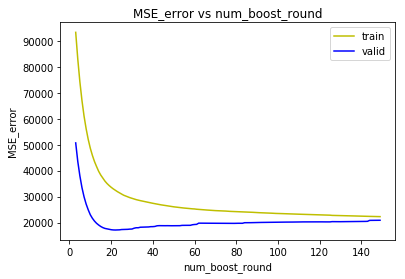

In [32]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='test')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('num_boost_round')
plt.title('MSE_error vs num_boost_round')
plt.legend()
plt.show()

In [33]:
for i,er in zip(x_list,valid_mse):
    print(i,er)

3 50740.7822126
4 43570.7360376
5 38043.953946
6 33511.9653451
7 29964.1204708
8 27174.7222342
9 24948.1685137
10 23030.4215084
11 21679.3280058
12 20594.7112233
13 19736.7226578
14 19077.5684928
15 18513.0456744
16 18077.0066365
17 17760.8175793
18 17590.194538
19 17412.9027221
20 17261.6002704
21 17172.8548849
22 17143.7381587
23 17176.7106117
24 17204.499741
25 17322.1665999
26 17345.9094812
27 17412.1027909
28 17409.532093
29 17490.1321575
30 17523.0900238
31 17833.7799743
32 18014.6348331
33 18010.5990134
34 18216.6133571
35 18241.3011224
36 18272.386393
37 18319.9707031
38 18325.9071528
39 18432.2978981
40 18442.9376729
41 18522.5560418
42 18765.370779
43 18823.3392492
44 18807.2513277
45 18782.7514563
46 18804.0007329
47 18814.961557
48 18782.7732602
49 18789.8915886
50 18786.2805308
51 18800.7164408
52 18798.5161258
53 18813.7543939
54 18930.0337983
55 18958.6750881
56 18947.9127887
57 18957.62981
58 18955.7440822
59 19176.919378
60 19272.4039919
61 19323.246692
62 19786.334579

In [23]:
#测试选取多少特征合适：
x_list = []

test_mse = []
valid_mse = []

for i in range(2,90):
    print(i,end=' ')
    x_list.append(i)
    features = features_all_merge[:i]

    X_train = train_x[features].values
    X_test = test_x[features].values
    
    lgb_train = lgb.Dataset(X_train, y_train,silent=True)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


# specify your configurations as a dict
    params = {'task': 'train',
       'boosting_type': 'gbdt',
       'objective': 'regression',
       'metric':  'l2',
       'num_leaves': 2**8,
       'learning_rate': 0.1,
       'feature_fraction': 0.9,
       'bagging_fraction': 0.9,
       'bagging_freq': 5,
       'verbose': 50,
        'verbose_eval':50}

    #print('Start training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=70,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=10,
                    verbose_eval=False)

    # print('Save model...')

    #print('Start predicting...')


    # predict

    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    vlid_pred = gbm.predict(valid_x[features], num_iteration=gbm.best_iteration)
    
    
    test_mse.append(mean_squared_error(y_test, y_pred))
    valid_mse.append(mean_squared_error(valid_y, vlid_pred))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 

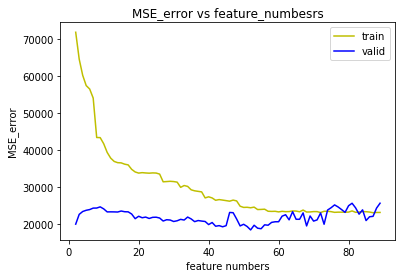

In [24]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='train')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('feature numbers')
plt.title('MSE_error vs feature_numbesrs')
plt.legend()
plt.show()

In [25]:
for i,er in zip(x_list,valid_mse):
    print(i,er)

2 20020.1541642
3 22662.9986925
4 23437.1943586
5 23769.7430124
6 23962.5041956
7 24356.0528971
8 24372.4670037
9 24693.6671811
10 24149.9578629
11 23330.4566278
12 23345.5175989
13 23332.022559
14 23299.565671
15 23567.770976
16 23378.8015193
17 23348.8020127
18 22755.0395711
19 21498.9286133
20 22157.6187894
21 21753.9721295
22 21931.6676129
23 21558.3572566
24 21864.5197332
25 21899.1796991
26 21672.3766865
27 20865.4764525
28 21214.4530236
29 21136.7726962
30 20741.0607075
31 20935.2649613
32 21316.5288014
33 21132.9832561
34 21935.7688722
35 21432.6656414
36 20699.1869133
37 20999.1643403
38 20853.7985436
39 20741.4081069
40 19907.2931838
41 20463.7703748
42 19457.1828981
43 19621.687833
44 19312.082464
45 19608.0976218
46 23181.816718
47 23115.6617531
48 21418.8406952
49 19539.1996821
50 19989.0612102
51 19391.5471834
52 18463.3770536
53 19724.8707931
54 18928.5178421
55 18783.9357868
56 19839.4573115
57 19735.0579205
58 20499.6862878
59 20665.5381983
60 20673.8343987
61 22177.05

In [26]:
for i,er in zip(x_list,test_mse):
    print(i,er)

2 71880.400591
3 64616.3909981
4 60238.7408231
5 57466.8667767
6 56528.962993
7 54094.3078248
8 43435.5735453
9 43406.8582878
10 41761.1225644
11 39401.5024075
12 37863.3985182
13 36969.1935638
14 36632.9651729
15 36578.5535469
16 36229.4347591
17 36030.7183271
18 34829.3543772
19 34124.4235289
20 33819.4107039
21 33938.4284752
22 33854.9694533
23 33796.1270154
24 33868.1573184
25 33832.4346201
26 33544.1767714
27 31464.0604033
28 31531.7817517
29 31600.4134108
30 31531.1309048
31 31377.5779861
32 29966.6695885
33 30456.731121
34 30224.012616
35 29301.1620243
36 29028.3280527
37 28883.6444873
38 28741.9927454
39 27113.995745
40 27409.8597127
41 27101.9180859
42 26472.6437945
43 26659.4210992
44 26523.6036987
45 26378.2966102
46 26227.686427
47 26522.2813534
48 26298.9303057
49 24870.3561049
50 24543.8780131
51 24579.9710197
52 24448.5599329
53 24624.2115075
54 23967.0863325
55 24002.6721661
56 24062.7625994
57 23507.0267191
58 23464.6535828
59 23496.5108156
60 23332.6018978
61 23490.50

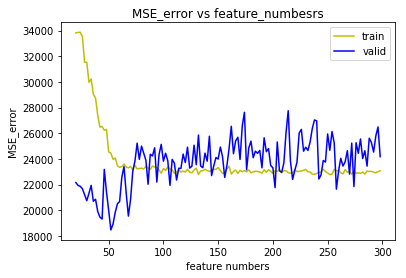

In [22]:
import matplotlib.pyplot as plt

plt.plot(x_list,test_mse,'y',label='train')
plt.plot(x_list,valid_mse,'b',label='valid')
plt.ylabel('MSE_error')
plt.xlabel('feature numbers')
plt.title('MSE_error vs feature_numbesrs')
plt.legend()
plt.show()

In [ ]:
#6:200
The MAE of prediction train_data is: 83.0561471035
The MAE of prediction valid_data is: 76.3668730174
The MSE of prediction train_data is: 23039.3360944
The MSE of prediction valid_data is: 41572.0933853
#6:250
The MAE of prediction train_data is: 81.1884558928
The MAE of prediction valid_data is: 76.7183415981
The MSE of prediction train_data is: 22166.3590463
The MSE of prediction valid_data is: 41712.7726661
#7:250 0.8
The MAE of prediction train_data is: 74.9100660435
The MAE of prediction valid_data is: 79.4141075551
The MSE of prediction train_data is: 19741.1246308
The MSE of prediction valid_data is: 41396.4308577
#7--200 0.9
The MAE of prediction train_data is: 76.7345500909
The MAE of prediction valid_data is: 74.4525232603
The MSE of prediction train_data is: 20667.0616598
The MSE of prediction valid_data is: 35091.2887143
#7_120
The MAE of prediction train_data is: 80.110400928
The MAE of prediction valid_data is: 70.5577879956
The MSE of prediction train_data is: 22059.2098889
The MSE of prediction valid_data is: 30846.495631
    8-120
The MAE of prediction train_data is: 74.3726051723
The MAE of prediction valid_data is: 71.7997211502
The MSE of prediction train_data is: 19841.7301444
The MSE of prediction valid_data is: 29907.5465857
    8-80
The MAE of prediction train_data is: 77.2870112566
The MAE of prediction valid_data is: 69.3831830295
The MSE of prediction train_data is: 21083.3210636
The MSE of prediction valid_data is: 26505.6387558
    8-70
The MAE of prediction train_data is: 78.3009383899
The MAE of prediction valid_data is: 69.1775998688
The MSE of prediction train_data is: 21530.9575777
The MSE of prediction valid_data is: 26449.3087565
    8-70-300
The MAE of prediction train_data is: 79.8031729732
The MAE of prediction valid_data is: 75.7727416998
The MSE of prediction train_data is: 22947.1934166
The MSE of prediction valid_data is: 24306.0711405

In [46]:

### 特征选择   保存模型特征重要性
df = pd.DataFrame(train_x.columns.tolist(), columns=['feature'])
df['importance']=list(gbm.feature_importance())                           # 特征分数
df = df.sort_values(by='importance',ascending=False)                      # 特征排序
df.to_csv("./edt_allfeature_score1119.csv",index=None,encoding='gbk')  # 保存分数

In [59]:
#预测集：pred_list

for day in valid_list:
    print(day,end=' ')
    #,usecols=read_cols
    day_all_data = pd.read_csv(r'E:\jupyter\CTM\data_train\train\edt_%s.csv'%day,usecols=read_cols)
    #day_all_data = day_all_data[day_all_data.end_time.notnull()]
    day_after_2 = day_all[day_all.index(day)+1]
    day_after_2_int = int('20'+day_after_2+'045959')
    day_all_data = day_all_data[day_all_data.end_time<day_after_2_int]
    
    print(day_all_data.shape)
    day_all_data.index = range(len(day_all_data))
    
    day_all_data['his_evet_count_null'] = day_all_data['all_count'].apply(lambda x:x is None).apply(int)
    day_all_data.fillna(0,inplace=True)

    #valid_x_i = day_all_data[features]
    valid_x_i = day_all_data[features]
    valid_y_i = day_all_data['day_0_bef_end_time']
    
    vlid_pred_i = gbm.predict(valid_x_i, num_iteration=gbm.best_iteration)
    
#    day_all_data['pred_edt'] = vlid_pred
#    day_all_data['pred_error'] = day_all_data[['pred_edt','day_0_bef_end_time']].apply(lambda x:abs(x[0]-x[1]),axis=1)
    
    
    print('The MAE of valid_data is:', mean_absolute_error(valid_y_i, vlid_pred_i))
    print('The MSE of valid_data is:', mean_squared_error(valid_y_i, vlid_pred_i))
    

181103 (175980, 311)
The MAE of valid_data is: 166.080834402
The MSE of valid_data is: 57990.7354973
181104 (145878, 311)
The MAE of valid_data is: 65.8749961956
The MSE of valid_data is: 12683.9870496
181105 (99026, 311)
The MAE of valid_data is: 65.8523265765
The MSE of valid_data is: 13576.447594
181106 (93094, 311)
The MAE of valid_data is: 54.626044459
The MSE of valid_data is: 12586.5362639
181107 (71380, 311)
The MAE of valid_data is: 63.211155843
The MSE of valid_data is: 16560.3799062
181108 (58269, 311)
The MAE of valid_data is: 61.5210921701
The MSE of valid_data is: 22096.8643007
181109 (41240, 311)
The MAE of valid_data is: 82.6052725355
The MSE of valid_data is: 40100.0435456
181110 (25953, 311)
The MAE of valid_data is: 100.781009289
The MSE of valid_data is: 63549.5286057


In [ ]:
#all feature
181104 (145878, 518)
The MAE of prediction valid_data is: 73.2071790515
The MSE of prediction valid_data is: 14136.0252526
181105 (99026, 518)
The MAE of prediction valid_data is: 69.6604984692
The MSE of prediction valid_data is: 16680.3839848
181106 (93094, 518)
The MAE of prediction valid_data is: 61.6821598367
The MSE of prediction valid_data is: 17716.1614961
181107 (71380, 518)
The MAE of prediction valid_data is: 75.1102475505
The MSE of prediction valid_data is: 24389.6459194
181108 (58269, 518)
The MAE of prediction valid_data is: 71.82082446
The MSE of prediction valid_data is: 31324.1827578
181109 (41240, 518)
The MAE of prediction valid_data is: 125.864379543
The MSE of prediction valid_data is: 66415.145898
181110 (25953, 518)
The MAE of prediction valid_data is: 116.507439687
The MSE of prediction valid_data is: 84509.5358538

In [41]:
valid_x_i.shape

(25953, 52)